# Customer analytics – understanding customer behavior

It is critical to many businesses to be able to understand and predict what their customers are likely to
purchase or view. The deeper the understanding you have about your customers, the better competitive power you will have against your competitors.

Customer analytics can be used at any point of the marketing process. It can be used to monitor and track how customers interact with the products or react to different marketing strategies. This typically requires using data analysis and visualization techniques to build reports or dashboards that can easily show key performance indicators (KPIs).

One of the common use cases of customer analytics is sales funnel analytics. By analyzing sales funnel data, we can monitor and track the life cycle of customers, gaining insights such as through which marketing channel they sign up, how often they log into the system, what types of products they browsed and purchased, or how they fall off from each step of the funnel.

Customer analytics can also be used to identify different groups of customers based on their behavior. Customer segmentation is a good example and outcome of customer analytics. Through identifying subgroups of similar customers, you can better understand the target populations. For example, the marketing strategy for low-engagement customers should be different from the marketing strategy for high-engagement customers. By effectively segmenting the customer base by the level of engagement, you can have a deeper understanding of how different groups of customers behave and react to different marketing strategies. This further helps you better target certain subgroups of customers.

Another good use case of customer analytics is using predictive analytics on customer data. With customer data, you can have a deeper understanding of what attributes and characteristics of customers are highly correlated with the outcomes of your interest. For example, if you'd like to improve the response and engagement rates, you can analyze the data to identify those characteristics of customers that result in higher responses and engagement rates. Then, you can build predictive models that predict how likely it is that your customers are going to respond to your marketing messages.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/Users/muratbakir/Desktop/Hands_on_Data_Science/Chapter_7/Customer_Behavior/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.shape

(9134, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Now that we have loaded the data into our Python environment, we are going to analyze it
to understand how different customers behave and react to different marketing strategies.
We are going to follow these steps:
1. Overall engagement rate
2. Engagement rates by offer type
3. Engagement rates by offer type and vehicle class
4. Engagement rates by sales channel
5. Engagement rates by sales channel and vehicle size

The first thing we are going to need to understand is the overall marketing response or
engagement rate.

In [5]:
df.groupby('Response')['Customer'].count()

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

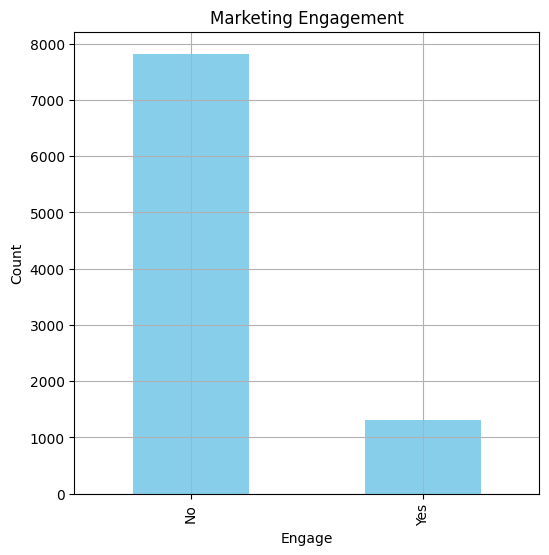

In [7]:
ax = df.groupby('Response')['Customer'].count().plot(
  kind='bar',
  grid=True,
  color='skyblue',
  figsize=(6,6),
  title='Marketing Engagement'
)

ax.set_xlabel('Engage')
ax.set_ylabel('Count')

plt.show()

In [8]:
df.groupby('Response')['Customer'].count() / df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

From these results, we can see that only about 14% of the customers responded to the
marketing calls.

 * Engagement Rates by Offer Type

In [18]:
by_offer_type_df = df.loc[
  df['Response']=='Yes'
].groupby('Renew Offer Type')['Customer'].count() / df.groupby('Renew Offer Type')['Customer'].count()

<function matplotlib.pyplot.show(close=None, block=None)>

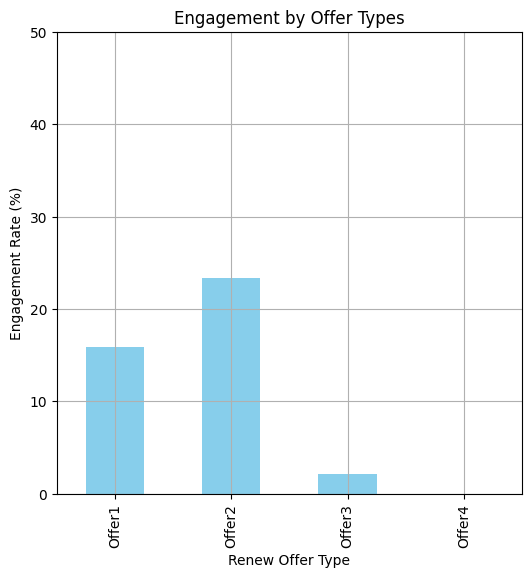

In [24]:
ax = (by_offer_type_df*100).plot(
  kind='bar',
  grid=True,
  figsize=(6,6),
  color='skyblue',
  title='Engagement by Offer Types'
)

ax.set_ylabel('Engagement Rate (%)')
ax.set_ylim([0,50])
plt.show

As you can easily notice from this plot, Offer2 had the highest engagement rate among the
customers. When conducting customer analytics, as discussed earlier, we often want to
know the demographics and attributes of customers for each event, so that we can
understand what works best for which type of customers. This can lead to further
improvements in the next marketing campaign by better targeting those subgroups of
customers.

The marketers can benefit from this information itself, as this finding provides a
useful insight into which type of offer worked best and had the highest response rate from
customers. However, we can gain more insights on how different customers with different
backgrounds or characteristics react differently to each offer types.

 - Offer Type & Vehicle Class

In [29]:
by_offer_type_df = df.loc[
  df['Response']=='Yes'
].groupby(['Renew Offer Type', 'Vehicle Class'])['Customer'].count() / df.groupby('Renew Offer Type')['Customer'].count()

by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

As you can see from this code, we are using the unstack function in a pandas DataFrame
to pivot the data and extract and transform the inner-level group to columns. It will be
easier to look at the result.

In [30]:
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


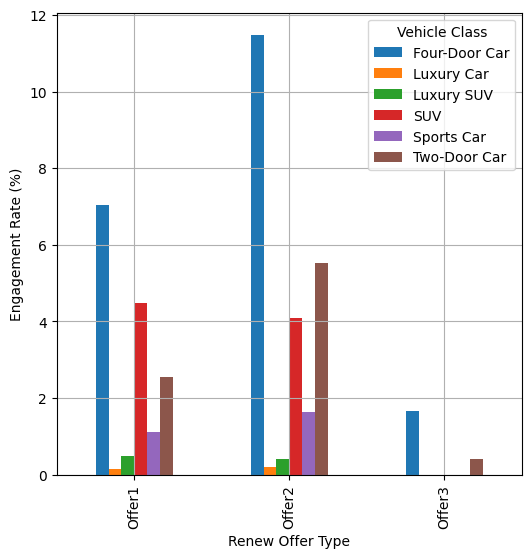

In [32]:
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(6, 6),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

Here, we can see how customers with
different vehicle classes engage differently with other types of renewal offers. For example,
customers with Four-Door Car respond the most frequently for all offer types. However,
customers with SUV respond with a higher chance to Offer1 than to Offer2. As you can
see from these results, we can gain more insights by breaking down the customer
demographics further. If we see any significant difference in the response rates among
different customer segments, we can fine-tune who to target for different sets of offers. In
our example, if we believe customers with SUV respond to Offer1 with a significantly
higher degree of engagement than to Offer2, then we can target SUV customers with
Offer1. On the other hand, if we believe customers with Two-Door Car respond to
Offer2 with a significantly higher degree of engagement than to other offer types, then we
can target Two-Door Car owners with Offer2.

- Engagement Rates by Sales Channel

In [33]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [36]:
by_sales_channel_df = df.loc[
  df['Response'] == 'Yes'
].groupby('Sales Channel')['Customer'].count() / df.groupby('Sales Channel')['Customer'].count()

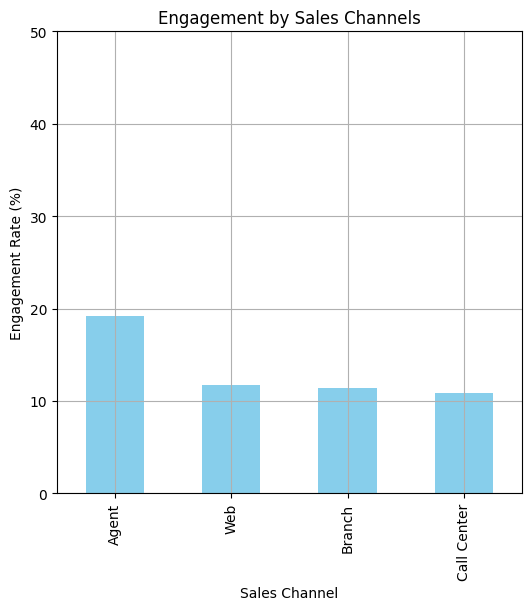

In [40]:
ax = (by_sales_channel_df*100).sort_values(ascending=False).plot(
  kind='bar',
  figsize=(6,6),
  grid=True,
  color='skyblue',
  title='Engagement by Sales Channels'
)

ax.set_ylabel('Engagement Rate (%)')
ax.set_ylim([0,50])

plt.show()

As you can see from this plot, Agent works the best in terms of getting responses from the
customers. Then, sales through Web works the second best. As before, let's break down this
result deeper and analyze to see whether the behavior change among customers with
different characteristics.

- Sales Channel & Vehicle Size

In [51]:
by_sales_channel_df = df.loc[
  df['Response']=='Yes'
].groupby(
  ['Sales Channel', 'Vehicle Size']
)['Customer'].count() / df.groupby(['Sales Channel'])['Customer'].count()

by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


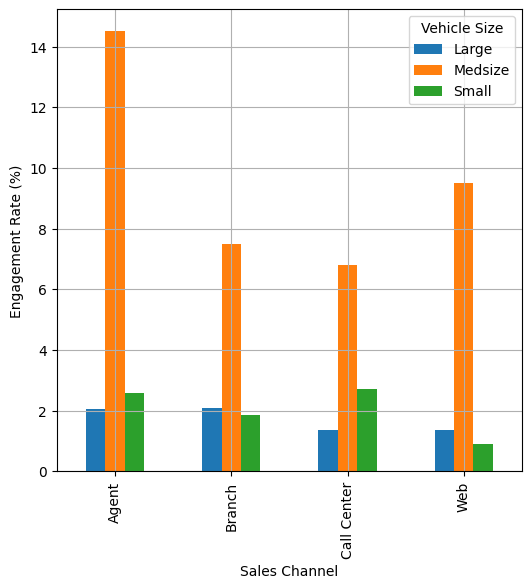

In [53]:
ax = (by_sales_channel_df*100).plot(
  kind='bar',
  figsize=(6,6),
  grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()


# 3. Customer Segmentation by CLV & Months Since Policy Inception

In this section, we will be segmenting our customer base by Customer Lifetime Value
and Months Since Policy Inception. Feel free to try different features for segmenting
the customer base.

In [65]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

Based on this information, we are going to define those customers with a Customer
Lifetime Value higher than the median as high-CLV customers and those with a CLV
below the median as low-CLV customers.

In [71]:
df['CLV Segment'] = df['Customer Lifetime Value'].apply(
  lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low'
)

df['CLV Segment'].head()

0     Low
1    High
2    High
3    High
4     Low
Name: CLV Segment, dtype: object

We are going to go through the same process for the Months Since Policy
Inception field.

In [73]:
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

Similarly, we are going to define those customers with Months Since Policy
Inception higher than the median as high Policy Age Segment customers and those
below the median as low Policy Age Segment customers.

In [76]:
df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(
  lambda x: 'High' if x > df['Months Since Policy Inception'].median()
  else 'Low'
)

df['Policy Age Segment'].head()

0     Low
1     Low
2     Low
3    High
4     Low
Name: Policy Age Segment, dtype: object

Why Use Log Scaling?

	1.	Handles Skewed Data: If most values are small, but some are very large (outliers), log scaling spreads the values more evenly.
	2.	Improves Visualization: It makes trends easier to see when there’s a wide range of values.
	3.	Better Interpretation: Exponential growth or power-law relationships become linear on a log scale.

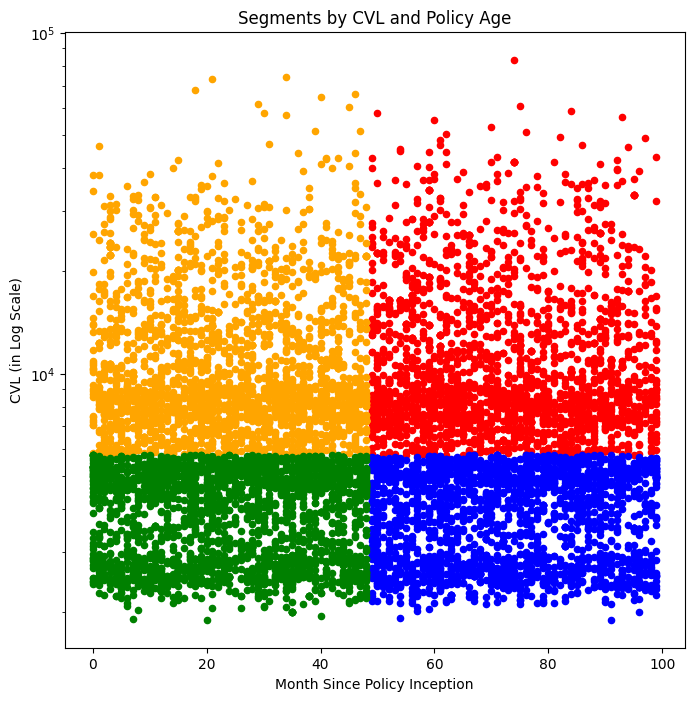

In [86]:
ax = df.loc[
  (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
  x='Months Since Policy Inception',
  y='Customer Lifetime Value',
  color='red',
  logy=True
)

df.loc[
  (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
  x='Months Since Policy Inception',
  y='Customer Lifetime Value',
  color='blue',
  logy=True,
  ax=ax
)

df.loc[
  (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
  x='Months Since Policy Inception',
  y='Customer Lifetime Value',
  color='orange',
  logy=True,
  ax=ax
)

df.loc[
  (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
  x='Months Since Policy Inception',
  y='Customer Lifetime Value',
  color='green',
  logy=True,
  ax=ax,
  figsize=(8,8)
)


ax.set_ylabel('CVL (in Log Scale)')
ax.set_xlabel('Month Since Policy Inception')
ax.set_title('Segments by CVL and Policy Age')

plt.show()

Now that we have created these four segments, let's see whether there is any noticeable
difference in the engagement rates among these four segments.

In [87]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'CLV Segment', 'Policy Age Segment'],
      dtype='object')

In [89]:
engagement_rates_by_segment_df = df.loc[
  df['Response'] == 'Yes'
].groupby([
  'CLV Segment', 'Policy Age Segment'
])['Customer'].count() / df.groupby(['CLV Segment', 'Policy Age Segment'])['Customer'].count()

engagement_rates_by_segment_df

CLV Segment  Policy Age Segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: Customer, dtype: float64

In [90]:
engagement_rates_by_segment_df = engagement_rates_by_segment_df.unstack().fillna(0)
engagement_rates_by_segment_df

Policy Age Segment,High,Low
CLV Segment,,
High,0.138728,0.132067
Low,0.162450,0.139957


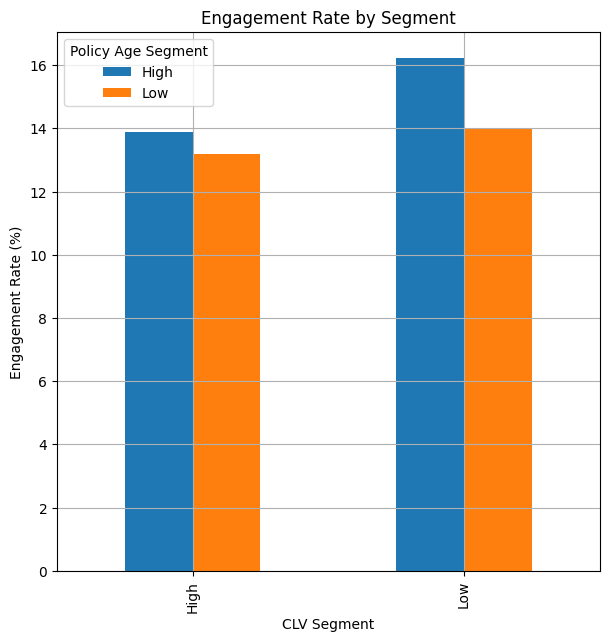

In [95]:
ax = (engagement_rates_by_segment_df*100).plot.bar(
  grid=True,
  figsize=(7,7),
)

ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rate by Segment')

plt.show()

In this chapter, we have discussed customer analytics. We have learned about what
customer analytics is and the importance and benefits of conducting customer analytics, as
well as different use cases of customer analytics. We have discussed how the rising
accessibility of customer data to businesses and the abundance of data available about
customers is resulting in higher competition, and we emphasized the importance of having
a good understanding of what customers like. Conducting customer analytics is an
important step to gain insights on the behavior of customers, which helps in forming better
marketing strategies, optimizing sales channels, and making other key business decisions.
Using customer analytics, you can monitor and track KPIs on how customers react to
different products and marketing strategies, effectively build segments of similar
customers, and build predictive models to improve engagement and retention rates, as well
as optimize marketing channels.